# Generatives Trainig mit DeepHull loss, generatives und normales Netz trainieren gleichzeitig

In [1]:
import numpy as np
import torch

from script.NeuralNets.Networks import ICNN
from script.NeuralNets.Networks import SequentialNN
from torch.utils.data import DataLoader
from script.dataInit import ConvexDataset, Rhombus
from script.NeuralNets.trainFunction import train_icnn_adversarial
from script.eval import Plots_for
from script.Verification.Verification import verification

In [2]:
icnn = ICNN([2, 10, 10, 1])
adversarial = SequentialNN([2, 10, 10, 2])
epochs = 10
batch_size = 10

number_of_adversarial_samples = 10000
number_of_train_samples = 10000
hyper_lambda = 1
x_range = [-1.5, 1.5]
y_range = [-1.5, 1.5]

In [3]:
included_space, ambient_space = Rhombus().get_uniform_samples(number_of_train_samples, x_range, y_range) #samples will be split in inside and outside the rhombus
true_extremal_points = Rhombus().get_extremal_points()
dataset = ConvexDataset(data=included_space)
train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
dataset = ConvexDataset(data= ambient_space)
ambient_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [4]:
random_samples = []
for i in range(number_of_adversarial_samples): # generate random samples
    x = np.random.default_rng().uniform(low=x_range[0], high=x_range[1])
    y = np.random.default_rng().uniform(low=y_range[0], high=y_range[1])
    random_samples.append([[x, y]])

value = torch.tensor(random_samples, requires_grad=True, dtype=torch.float64)
adversarial_set = ConvexDataset(data=value)
adversarial_loader = DataLoader(adversarial_set, batch_size=batch_size, shuffle=True)


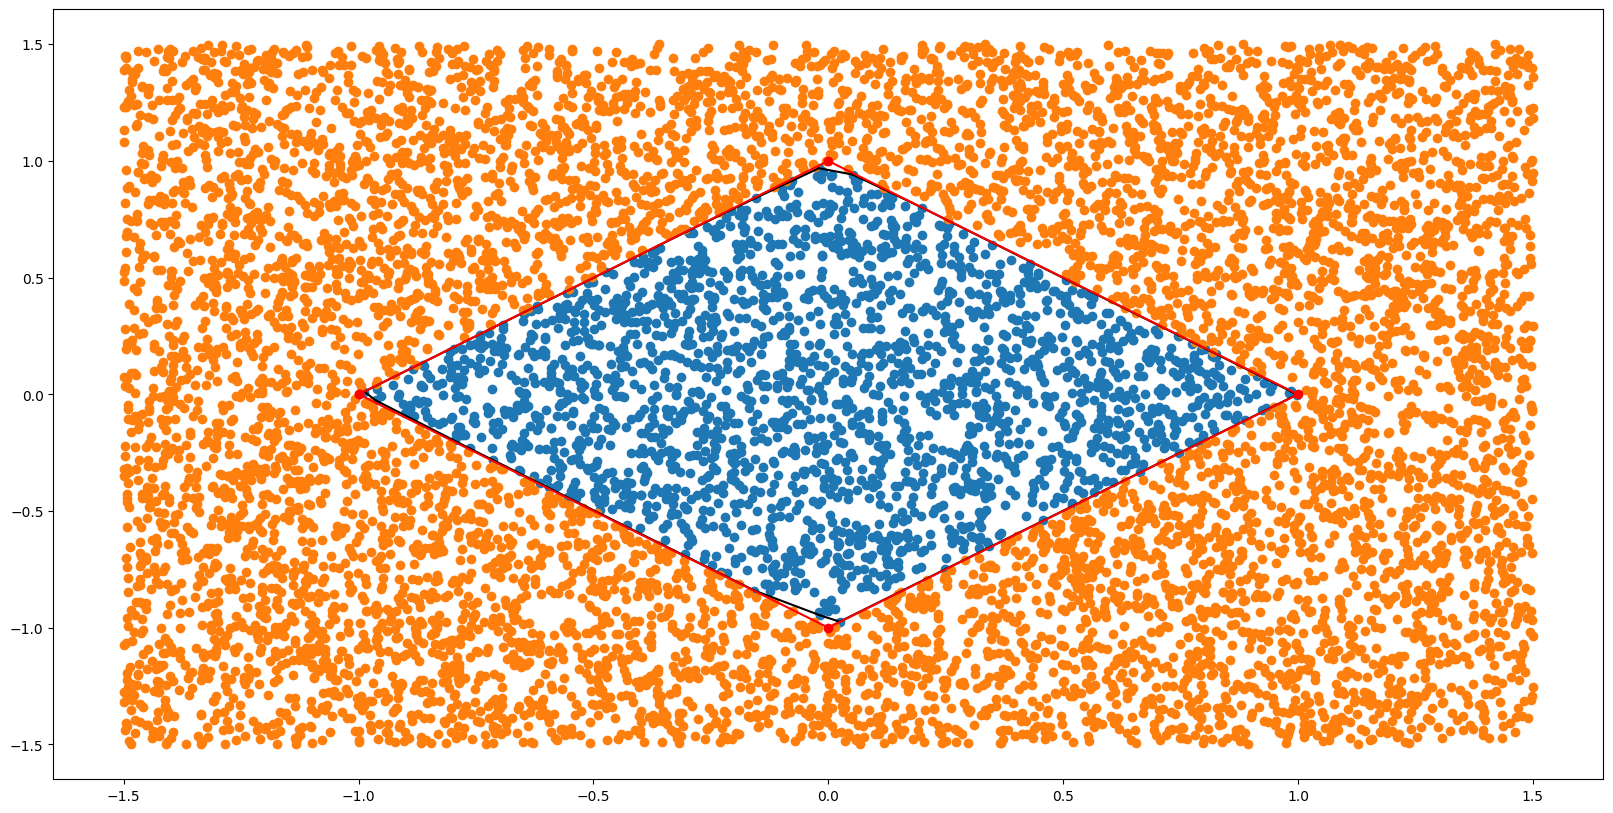

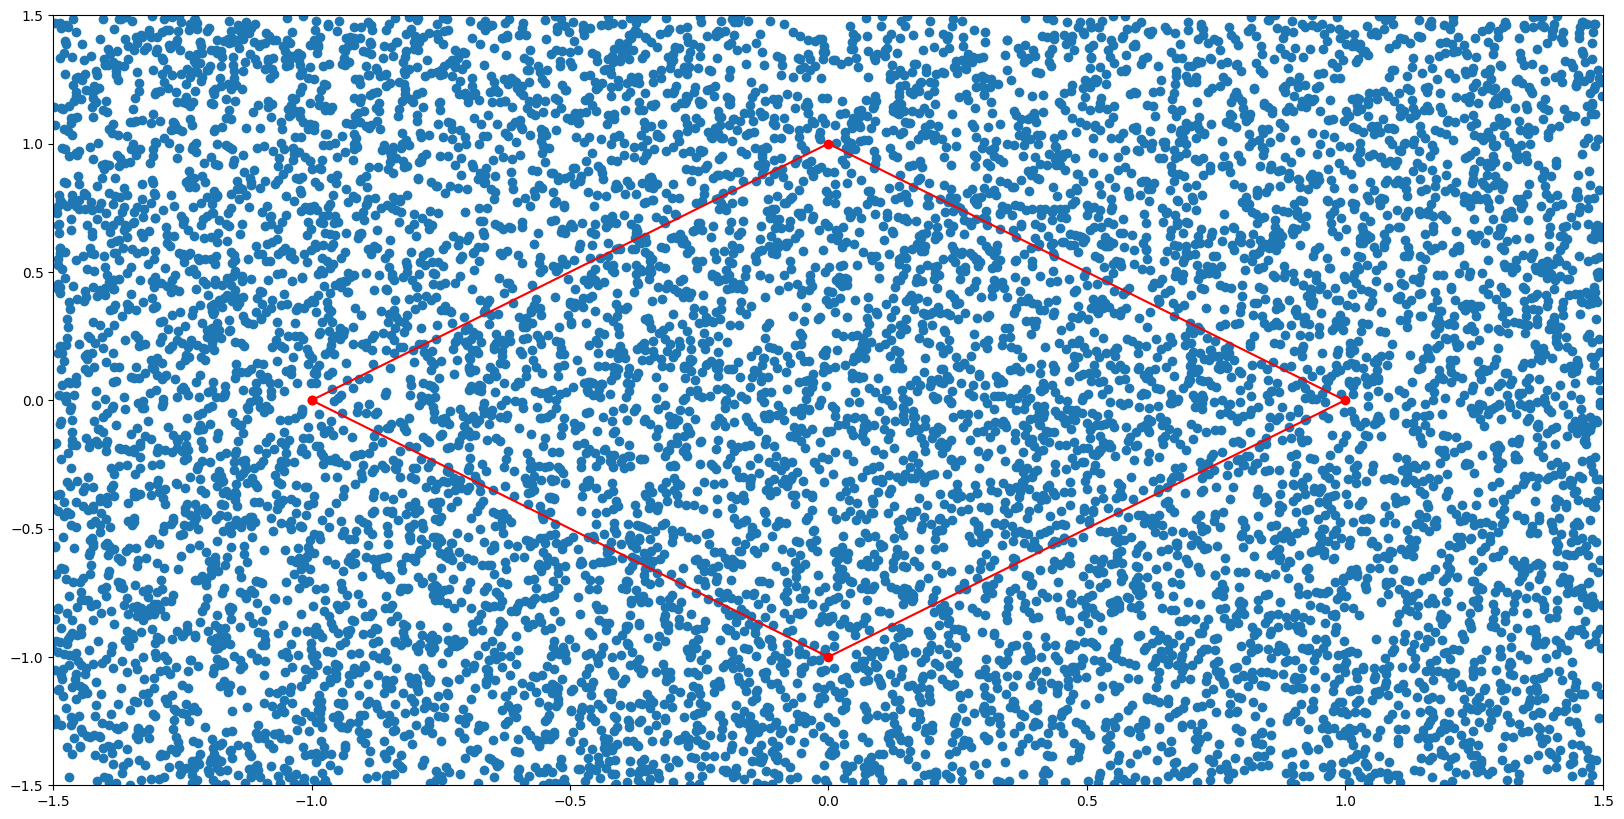

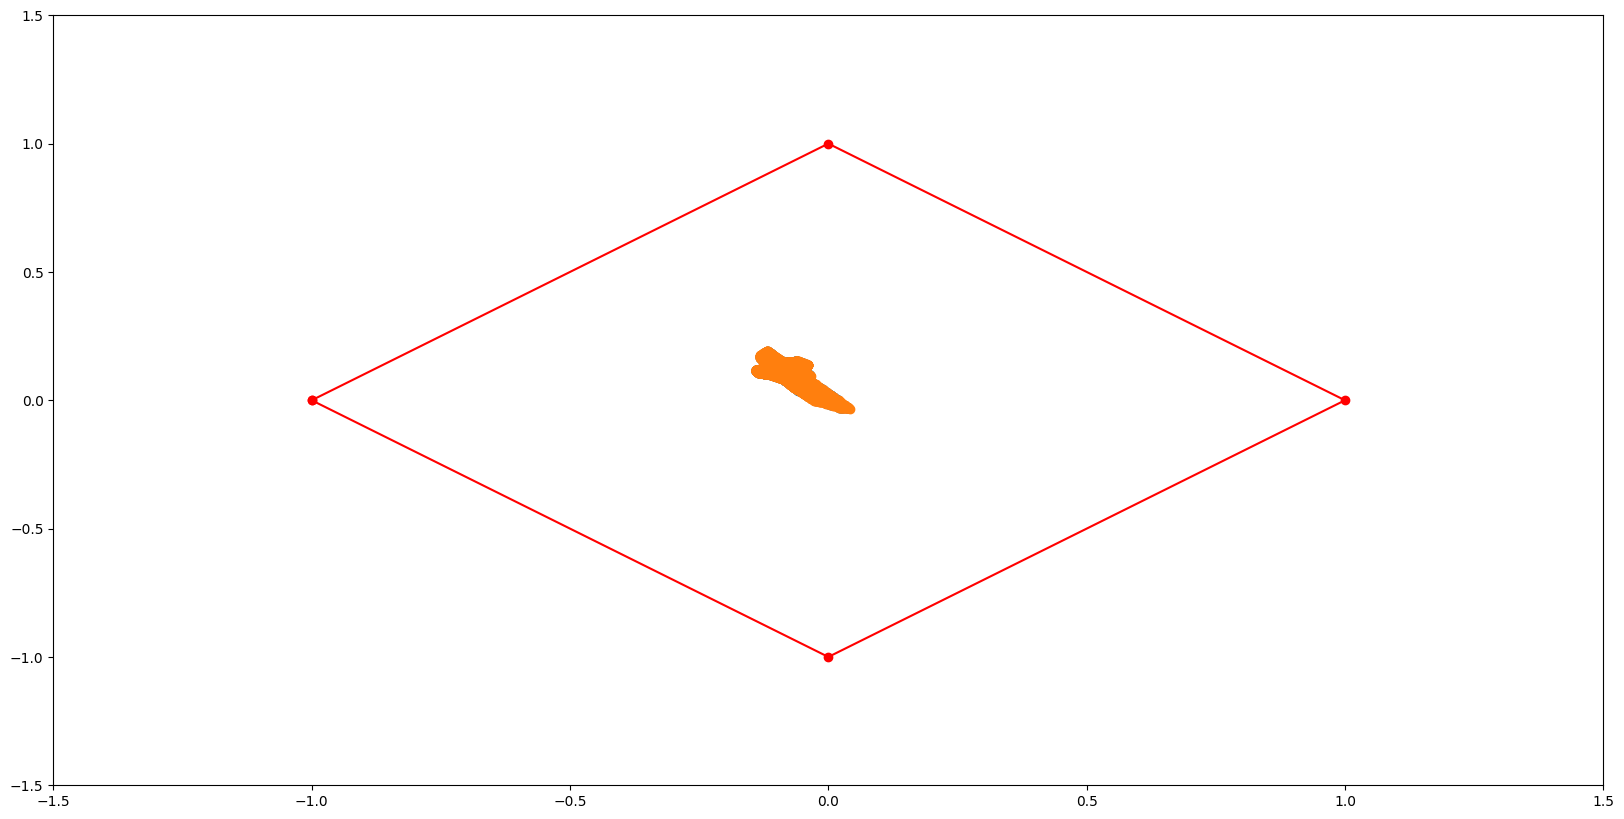

In [5]:
plots = Plots_for(0, icnn, included_space, ambient_space, true_extremal_points, x_range, y_range, adversarial=adversarial, adversarial_values=value)
plots.plt_initial()

plots.plt_adversarial_initial()
plots.plt_adversarial_dotted()


In [6]:
history = train_icnn_adversarial(icnn, adversarial, train_loader, adversarial_loader, epochs=epochs, hyper_lambda=hyper_lambda)


=== Epoch: 0===
batch = 0, mean loss = 1.8626325170050606, l_pos = 0.659297749779695, l_neg = 0.7132865092777158, l_gen = 0.4900482579476497
batch = 100, mean loss = 1.7821085417546152, l_pos = 0.629490852590846, l_neg = 0.6068075568789473, l_gen = 0.5458101322848212
batch = 200, mean loss = 1.7038438001053144, l_pos = 0.5967247019323654, l_neg = 0.48491091807083464, l_gen = 0.6222081801021143
batch = 219, mean loss = 1.6908610225346714, l_pos = 0.5907868966368179, l_neg = 0.46236394091943483, l_gen = 0.6377101849784185
=== Epoch: 1===
batch = 0, mean loss = 1.5682529943904775, l_pos = 0.5476545853115049, l_neg = 0.2056745853676202, l_gen = 0.8149238237113524
batch = 100, mean loss = 1.5096112562980462, l_pos = 0.4988520180937529, l_neg = 0.1438311758532886, l_gen = 0.8669280623510041
batch = 200, mean loss = 1.4830225590505255, l_pos = 0.4759244203005142, l_neg = 0.11139826070876742, l_gen = 0.8956998780412431
batch = 219, mean loss = 1.4795902859518746, l_pos = 0.472882799803124, l_n

In [7]:
history = train_icnn_adversarial(icnn, adversarial, train_loader, adversarial_loader, epochs=epochs, hyper_lambda=hyper_lambda)


=== Epoch: 0===
batch = 0, mean loss = 1.1270711320731932, l_pos = 0.1270558686356739, l_neg = 0.0033497545776775828, l_gen = 0.9966655088598418
batch = 100, mean loss = 1.123079380468753, l_pos = 0.12307721058111147, l_neg = 0.0013114243039491532, l_gen = 0.9986907455836924
batch = 200, mean loss = 1.117679857382817, l_pos = 0.11767863875240418, l_neg = 0.0009055616211451641, l_gen = 0.9990956570092686
batch = 219, mean loss = 1.116695344364083, l_pos = 0.11669421430603896, l_neg = 0.0008606161463167466, l_gen = 0.9991405139117279
=== Epoch: 1===
batch = 0, mean loss = 1.1052820818806686, l_pos = 0.10528197521589441, l_neg = 0.0002932313065056719, l_gen = 0.9997068753582685
batch = 100, mean loss = 1.100941603146961, l_pos = 0.10094152762454578, l_neg = 0.0002572633648648846, l_gen = 0.9997428121575505
batch = 200, mean loss = 1.0968880041336146, l_pos = 0.09688794692894062, l_neg = 0.00022171162115543658, l_gen = 0.9997783455835192
batch = 219, mean loss = 1.096174643820543, l_pos = 

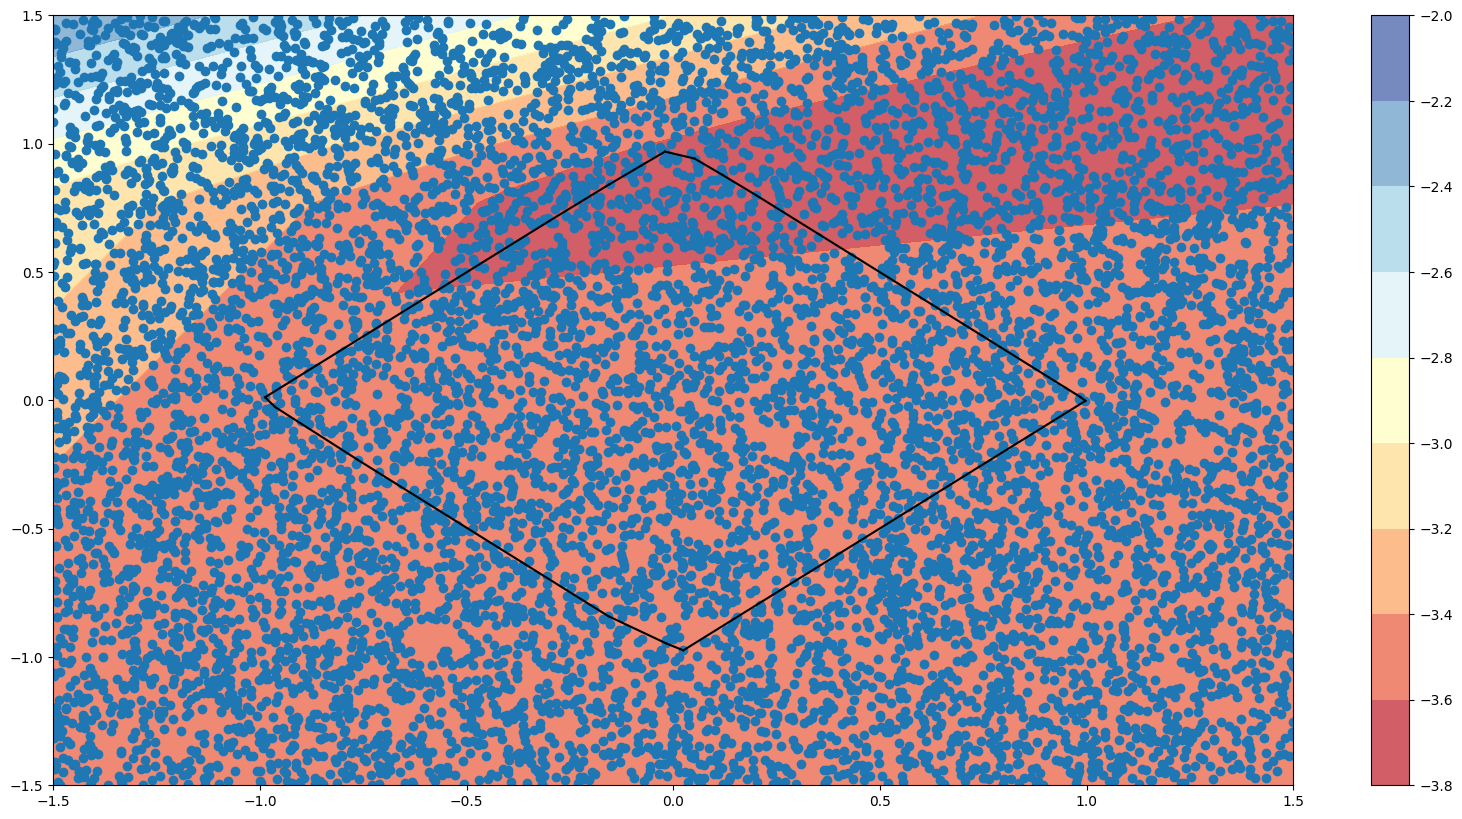

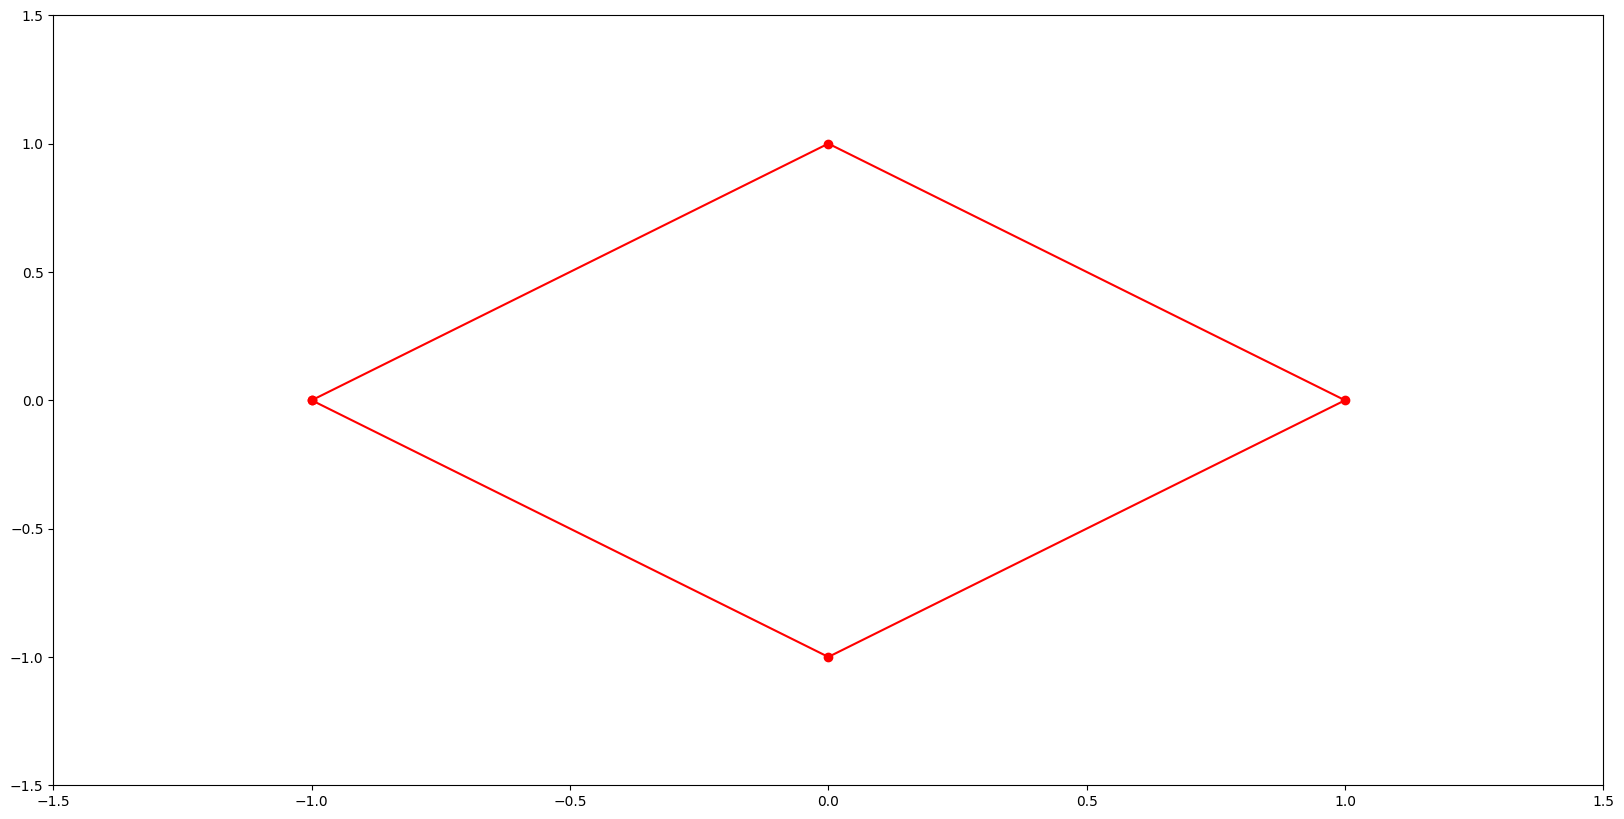

In [8]:
plots.plt_mesh()
plots.plt_adversarial_dotted()

In [9]:
A, b = Rhombus().get_A(), Rhombus().get_b()
result = verification(icnn, A_b=[A,b], sequential=False)

Set parameter Username
Academic license - for non-commercial use only - expires 2023-11-12
Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (win64)

CPU model: AMD Ryzen 7 5800H with Radeon Graphics, instruction set [SSE2|AVX|AVX2]
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 138 rows, 96 columns and 370 nonzeros
Model fingerprint: 0x7fb3b731
Variable types: 76 continuous, 20 integer (20 binary)
Coefficient statistics:
  Matrix range     [4e-05, 5e+03]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 5e+03]
  RHS range        [3e-02, 5e+03]
Presolve removed 84 rows and 57 columns
Presolve time: 0.00s
Presolved: 54 rows, 39 columns, 199 nonzeros
Variable types: 27 continuous, 12 integer (12 binary)
Found heuristic solution: objective -3.5317963

Root relaxation: objective -3.105781e+00, 26 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl | 

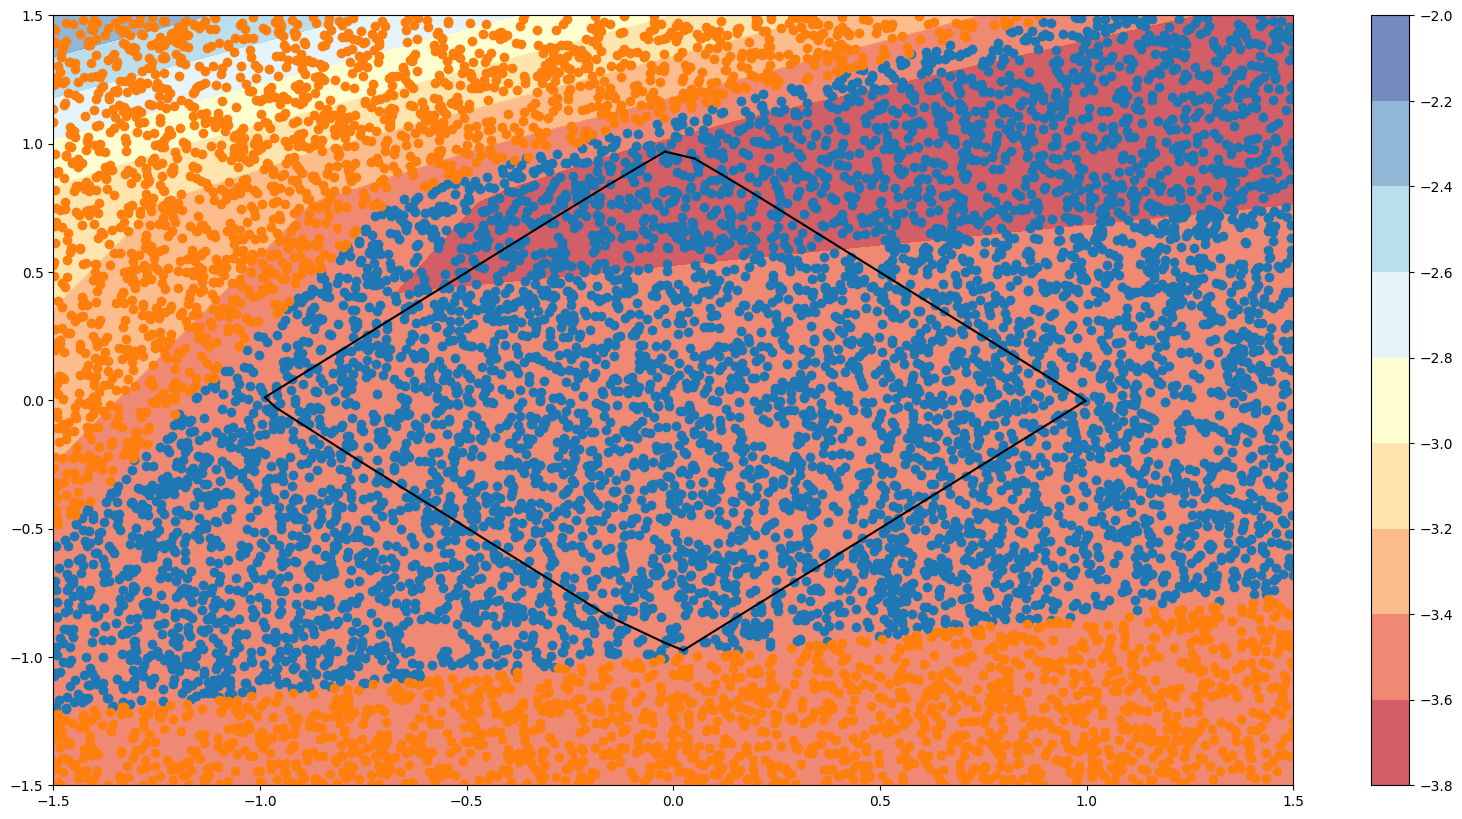

In [10]:
input_data, plots.c = result
plots.plt_mesh()